In [1]:
import sys
import os
from glob import glob

import xarray as xr
import matplotlib.pyplot as plt

sys.path.append("ECCOv4-py")
import ecco_v4_py as ecco
from ecco_download import *

In [2]:
# Set download directory to project directory
download_dir = os.getcwd()
short_name = 'ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4'

# Download SSH for the second week of 2000
ecco_podaac_download(ShortName = short_name,
                     StartDate = '2000-01-08', 
                     EndDate = '2000-01-14', 
                     download_root_dir = download_dir,
                     n_workers = 6, 
                     force_redownload = False)

created download directory /Users/emiliolr/Desktop/GTC-OTP/ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4

Total number of matching granules: 7

SEA_SURFACE_HEIGHT_day_mean_2000-01-08_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-11_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-09_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-10_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-14_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-13_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-12_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|##########

In [3]:
# Read the data into xarray stacked into one large array
ecco_file_pattern = os.path.join(download_dir, short_name, '*nc')

xds = xr.open_mfdataset(ecco_file_pattern, parallel = True, data_vars = 'minimal', coords = 'minimal', compat = 'override')
xds

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 13, time: 6, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2000-01-08T12:00:00 ... 2000-01-14T12:00:00
    ...         ...
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    SSH        (time, tile, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHIBC     (time, tile, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SSHNOIBC   (time, tile, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    ETAN       (time, tile, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1D
    time_coverage_end:            2000-01-09T00:00:00
    time_coverage_resolution:     P1D
    time_coverage_start:          2000-01-08T00:00:00
    title:                        ECCO Sea Surface Height - Daily Mean llc90 ...
    uuid:                         eed57010-4047-11eb-bb22-0cc47a3f4b7f

In [4]:
# Extract SSH values and calculate the mean over the week of data
dataarray_plot = xds.SSH
time_mean = dataarray_plot.mean('time').compute()

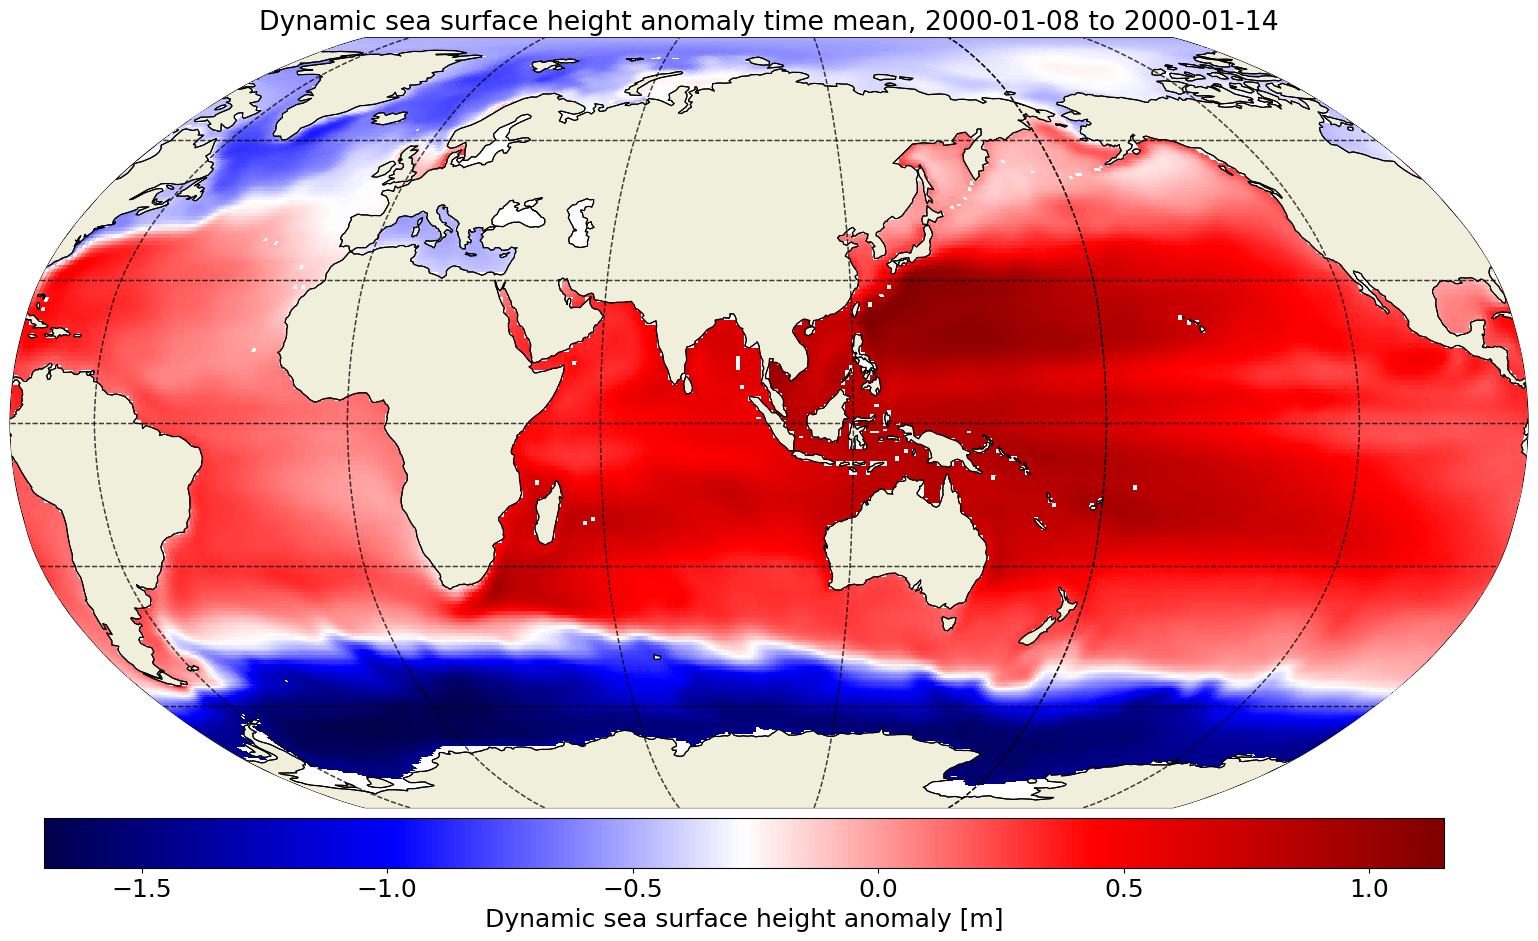

In [8]:
# Setting up plot parameters
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = [20, 10])
time_values = dataarray_plot.time.data
title_str = dataarray_plot.long_name + ' time mean, ' + str(time_values[0])[ : 10] + ' to ' + str(time_values[-1])[ : 10]

# Plotting SSH mean over the week-long period
plot_obj = ecco.plot_proj_to_latlon_grid(dataarray_plot.XC, dataarray_plot.YC, time_mean, show_colorbar = False, 
                                         user_lon_0 = 200, cmap = 'seismic')
plt.title(title_str)

# Add colorbar
cax = plt.axes([0.15, 0.05, 0.7, 0.05])
cbar = plt.colorbar(plot_obj[2], cax = cax, orientation = 'horizontal')
cbar.set_label(dataarray_plot.long_name + ' [' + dataarray_plot.units + ']',fontsize=18)
cax.tick_params(labelsize=18)